In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("Simple_Linear_Regression_Sales_data.csv")

In [4]:
dataset

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [5]:
dataset.keys()

Index(['TV', 'Sales'], dtype='object')

In [6]:
dataset.TV[0]

230.1

In [7]:
dataset.TV.shape

(200,)

In [10]:
dataset.Sales[0]

22.1

In [11]:
dataset.Sales.shape

(200,)

In [12]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [13]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [14]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=12)
regressor = LinearRegression()

In [16]:
x_train

array([[134.3],
       [281.4],
       [199.8],
       [ 95.7],
       [ 31.5],
       [ 39.5],
       [ 74.7],
       [ 43.1],
       [ 76.3],
       [131.1],
       [ 73.4],
       [147.3],
       [164.5],
       [ 50. ],
       [239.8],
       [104.6],
       [  7.8],
       [131.7],
       [191.1],
       [187.9],
       [  5.4],
       [224. ],
       [ 93.9],
       [217.7],
       [142.9],
       [ 26.8],
       [ 68.4],
       [149.7],
       [ 66.1],
       [ 89.7],
       [266.9],
       [ 75.5],
       [292.9],
       [284.3],
       [109.8],
       [276.7],
       [171.3],
       [216.4],
       [273.7],
       [227.2],
       [139.5],
       [ 17.2],
       [248.8],
       [166.8],
       [243.2],
       [199.8],
       [ 25. ],
       [216.8],
       [ 17.2],
       [149.8],
       [276.9],
       [283.6],
       [184.9],
       [241.7],
       [280.2],
       [234.5],
       [262.7],
       [136.2],
       [110.7],
       [280.7],
       [139.3],
       [ 76.4],
       [

In [17]:
y_train

array([11.2, 24.4, 11.4,  9.5,  9.5, 10.8, 14.7, 10.1, 12. , 18. , 10.9,
       14.6, 14.5,  8.4, 12.3, 10.4,  6.6, 12.9, 17.3, 14.7,  5.3, 11.6,
       15.3, 19.4, 15. ,  8.8, 13.6, 17.3,  8.6, 10.6, 25.4,  9.9, 21.4,
       15. , 12.4, 11.8, 19. , 22.6, 20.8, 14.8, 10.3,  9.3, 18.9, 19.6,
       25.4, 10.6,  7.2, 22.3,  5.9, 10.1, 27. , 25.5, 15.5, 21.8, 14.8,
       11.9, 20.2, 13.2, 16. , 16.1, 13.4, 11.8, 14.1, 22.1, 10.9, 15.6,
       11.7,  7.3, 14.6, 11.6, 12.2, 11.4, 11.3, 15.9, 12.9, 19.2, 18. ,
        7. , 17.2, 21.7, 18.4, 23.8,  9.7, 17.1, 18.3,  8.1,  8.7, 21.2,
       18.9, 12.6,  8.5,  9.3, 12.9,  5.5, 12. , 11. , 15.9, 13.4, 14.4,
       11.5, 11. , 19.8, 15.2, 12.8, 13.2, 11.7,  6.6,  7.3, 13.3, 18. ,
       11.7, 12.8, 16.7, 11.3,  9.7, 20.7,  9.4, 24.7, 17. , 15.9, 14.9,
       19.2, 19.6, 10.5,  9.7,  5.6, 20.2,  6.9, 18.5,  1.6, 10.8,  3.2,
        8.7])

In [18]:
x_train.shape

(133, 1)

In [19]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
predictions = regressor.predict(x_test)
predictions[0]

17.59005449056742

<function matplotlib.pyplot.show(*args, **kw)>

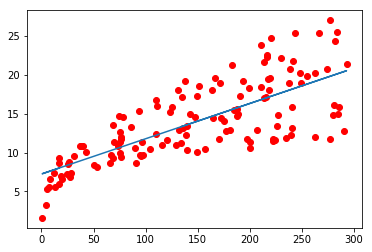

In [21]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train))
plt.show